# ESS 330 Final Project Report - Lab 9

Zachary Cramton (Colorado State University)  
Bella Conrad (Colorado State University)  
Rachel Delorie (Colorado State University)

# Urbanization, Density and Access to Public Parks in the United States

## Abstract

Currently, over 50% of the world’s population is living in urban areas and large cities. Urban planning has a key role in the experiences of residents living in these areas, where efficiency, utilitarianism, and profitability have dominated. With more studies focusing on a connection to nature and time outdoors with positive mental and physical health, we wanted to determine if any changes had been made in the urban planning field with regards to this aspect. We hypothesized that there is a linear relationship between urban population density and public open space availability. To determine this, we used datasets from the UN-Habitat Urban Indicators Database and the ParkServ Database. We formatted these datasets to fit together and work efficiently through using R, conducted an exploratory data analysis to define our variables, and then used a machine learning workflow to explore predicted values for different cities. For our built open space results, we used a boosted tree model, which gave us a 2.7644 RMSE and a 0.0136 R-squared, which provide an insignificant relationship. For our open space access results, we used a linear regression model which gave us an 18.5488 RMSE and a 0.6653 R-squared. Looking at these results, we did not find a significant relationship between urban population density and public open space availability but are interested to see if there is potential to develop this relationship. Urban planners should be shifting their values and goals for cities from efficiency and utilitarianism to an increase in natural open spaces instead.

### Introduction

Since 2008, the majority of the world’s population has lived in urban areas, a result of urbanization in developing countries \[@kohlhase2013new; @beall2010urbanization\]. The United States developed earlier than many nations, with more than 50 percent of the population living in urban areas by by the 14th Census in 1920.

> **Definition of Urban Areas in Census History**
>
> Prior to the 2020 Census urban areas were defined as any area with greater than 2500 people. Following the 2010 census urban clusters described areas with populations greater than 2,500 and less than 50,000; urbanized areas described areas with a population greater than 50,000. For the 2020 Census the threshold was changed to 5000 people \[@ratcliffe_redefining_2022\].

In the century since the 1920 census the percentage of individuals living in urban areas has increased to 80.7% \[@slack2020changing\]. As more people moved to urban areas, those areas expanded forming urbanized areas and large cities.

Urban planning has existed for centuries out of necessity, historically dominated by efficiency and utilitarianism, optimizing the world we live in for profitability, corporate productivity, and automobile-based mobility. This optimization came with sacrifices, which now impact an increasingly large majority of the population. In recent years, the discipline has begun to prioritize human factors over utilitarian efficiency. Thousands of years of living in rural settings makes urban living hard for most people’s biology. Connection to nature and time outdoors even in small amounts has been shown to be a vital part maintaining physical and mental health (nature&health). In an effort to make urban spaces more livable, planners are turning to parks and natural areas to connect people to nature.

Equity issues aside, overturning and correcting more than a century of bad planning is a daunting task. Many cities filled in and built up over the course of the 20th century as land became a premium commodity. How does this density present significant challenges for today’s planning professionals? This research seeks to investigate the relationship between urban demographics like density, and park access. In exploring this relationship, we hypothesize that there is an intermediate/sublinear relationship between urban population density and public open space availability.

### Data Overview

This report uses data from the UN-Habitat Urban Indicators Database and the ParkServe® Database maintained by the Trust for Public Land. The UN data relates to the UN-SDG 11.7.1 pertaining to access to open spaces and green areas.

The January 2025 version of the UN Open Spaces and Green Areas data includes the average share of urban areas allocated to streets and open public spaces as well as the share of the urban population with convenient access to an open public space.

> **UN Definition**
>
> In this case, the UN defines “convenient access to an open public space” as the “urban population withing 400 meters walking distance along the street network to an open public space” \[@may2000habitat\].

These data collected by the UN were collected in 2020 and provided as a .xls format spreadsheet. These data were converted to .csv format with Microsoft Excel. The ParkServe® data selected for use is the 2020 data set to match the year the UN data was recorded. Specifically, this report uses elements of the City Park Facts: Acreage & Park System Highlights. The ParkServe® data is much less synthesized and was available as a .xml file. The file was structured for viewing as a spreadsheet rather than for further analysis and included multiple worksheets withing the workbook. In converting the file to a .csv file, the data spread across multiple worksheets was collated in a single worksheet and converted to a summarized dataset .csv file.

These data are lacking a shared numerical position data type but share a city name column formatted as “city_name, two_letter_state_abbreviation”. There is not perfect overlap between cities with data in each database however, there are 25 cities shared between the datasets. Cities present in only one data set will be culled when the data is joined.

### Methods

Firstly, we cleaned the data. This is important for our project because the raw data was downloaded as Excel spreadsheets, but some reformatting in Excel was required to effectively export as a .csv file and import the new summarized file to RStudio. Any remaining data cleaning occurred in R as needed, including header changes and creation of additional columns to reflect relational data. We then conducted exploratory data analysis (EDA) to visualize the data to further understand what we were looking at. Next, we joined the datasets by “city name” to have a complete working dataset. This data was combined into a single data frame, using an inner join, because of the high number of cities in one dataset that the other lacks. The new dataset includes only cities found in both datasets, with columns from both.

> **Limiting Scope**
>
> The cities found in only one dataset were cut from the data to accommodate the limited scope of the project. Unfortunately, this left a very small sample size whcih made drawing definitive conclusions difficult. With a bigger scope it is possible that additional data could be used to understand these patterns with more depth.

As we continued, we prepped the data and split it into training and testing datasets. We started by using the 10-fold cross-validation on the training data, but the dataset was too small, so it was overfitting. Then we tried bootstraps before finally switching to 3-fold cross validation for more representative results. We created a recipe and set up several models in regression mode. Using these models and the recipe, we created a workflow set. We then used the map function over workflow using workflow map. We used the highest performing model to fit the data and augment. We moved on to plotting and graphing the data to visually display our test results. If time allowed and our model was more effective, we would have continued to explore using the model to predict values for cities included in only one document.

## Results

### Exploratory Data Analysis (EDA)

In [ ]:
library(baguette)       # Model bagging methods for ensemble learning

Loading required package: parsnip

Loading required package: ggplot2

Registered S3 method overwritten by 'ggfortify':
  method          from   
  autoplot.glmnet parsnip

here() starts at C:/Users/Zacha/github/CSU/ESS_330/ess_330_final_project


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following objects are masked from 'package:flextable':

    highlight, style

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'purrr'

The following object is masked from 'package:flextable':

    compose

Loading required package: dplyr


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'recipes'

The following object is masked from 'package:stats':

    step

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ tidyr        1.3.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ rsample      1.2.1     ✔ yardstick    1.3.2
✔ tibble       3.2.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks plotly::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::compose()    masks flextable::compose()
✖ scales::discard()   masks purrr::discard()
✖ dplyr::filter()     masks plotly::filter(), stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'vip'

The following object is masked from 'package:utils':

    vi


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

The following object is masked from 'package:plotly':

    slice

Rows: 100 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): city_name, city_pop, land_area, revised_area, percent_designed_par...
dbl  (5): parkland_area, designed_park_area, natural_park_area, parkland_per...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 59 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): city_name
dbl (2): mean_percent_built_open_space, mean_percent_open_space_access

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Variable,Mean,Median,Standard Deviation,1st Quartile (Q1),3rd Quartile (Q3)
city_pop,"1,113,559.56","655,061.00","1,696,534.55","377,963.00","1,006,142.00"
designed_park_area,"5,559.20","3,864.00","5,020.97","2,652.00","5,785.00"
dn_area_ratio,2.42,1.02,4.90,0.26,1.56
land_area,"178,285.40","88,800.00","224,466.29","53,723.00","201,635.00"
land_per_capita,0.33,0.16,0.70,0.08,0.28
mean_percent_built_open_space,18.71,18.20,3.23,17.20,20.60
mean_percent_open_space_access,42.06,40.00,17.04,29.80,52.80
natural_park_area,"48,113.72","4,538.00","180,621.84","1,429.00","22,527.00"
park_units,460.80,302.00,811.06,179.00,416.00
park_units_per_10k_pop,4.55,4.54,1.72,3.28,5.42


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park,pop_near_parks
"Anchorage, AK","299,100","1,086,019",0.28,"914,138",0.00,84.17,"3,056.30",0.75,"224,597.2"
"New Orleans, LA","386,105","107,655",3.59,"27,775",0.11,25.80,71.94,0.80,"308,698.7"
"Washington, DC","702,321","38,955",18.03,"9,478",1.09,24.33,13.50,0.98,"690,170.8"
"New York, NY","8,627,852","187,946",45.91,"40,190",1.01,21.38,4.66,0.99,"8,539,502.8"
"San Diego, CA","1,399,844","205,918",6.80,"39,385",0.29,19.13,28.14,0.81,"1,127,322.4"
"Virginia Beach, VA","457,832","159,341",2.87,"28,312",0.26,17.77,61.84,0.68,"309,073.2"
"Boston, MA","687,725","29,175",23.57,"5,072",1.02,17.38,7.38,1.00,"686,280.8"
"Honolulu, HI","1,006,142","379,885",2.65,"57,141",0.09,15.04,56.79,0.79,"797,287.0"
"Minneapolis, MN","421,339","33,958",12.41,"5,075",8.47,14.94,12.04,0.98,"413,506.3"
"Jacksonville, FL","925,142","467,298",1.98,"67,707",0.14,14.49,73.19,0.35,"322,004.9"


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park,pop_near_parks
"Durham, NC","275,758","68,678",4.02,"2,665",0.11,3.88,9.66,0.51,"141,094.34"
"Memphis, TN","655,061","196,098",3.34,"9,194",1.10,4.69,9.15,0.46,"300,312.72"
"Winston-Salem, NC","248,839","83,917",2.97,"4,263",7.34,5.08,17.13,0.37,"92,267.01"
"Detroit, MI","660,960","87,844",7.52,"5,102",3.63,5.81,7.72,0.80,"528,748.17"
"Toledo, OH","277,467","51,169",5.42,"3,175",1.41,6.20,11.44,0.81,"225,200.54"
"Atlanta, GA","498,059","84,250",5.91,"5,293",2.70,6.28,10.63,0.72,"360,828.80"
"Cleveland, OH","377,963","46,880",8.06,"3,170",1.30,6.76,8.39,0.83,"315,251.38"
"Dallas, TX","1,378,903","215,676",6.39,"20,352",1.17,9.44,14.76,0.71,"977,793.91"
"St. Louis, MO","310,144","39,090",7.93,"3,749",23.66,9.59,12.09,0.98,"303,354.95"
"Chicago, IL","2,744,859","136,796",20.07,"13,609",1.94,9.95,4.74,0.98,"2,696,000.51"


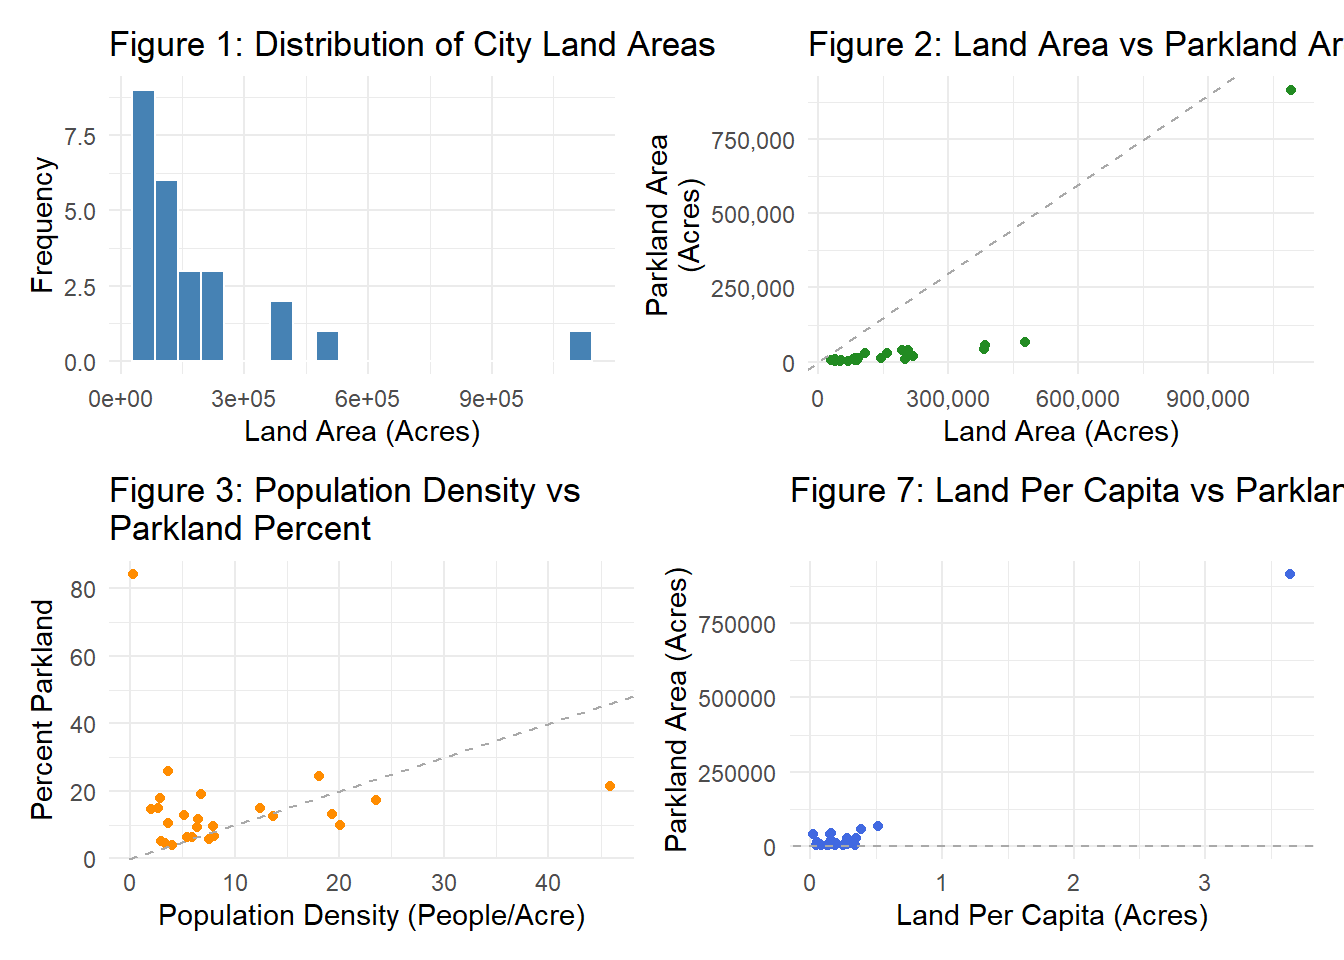

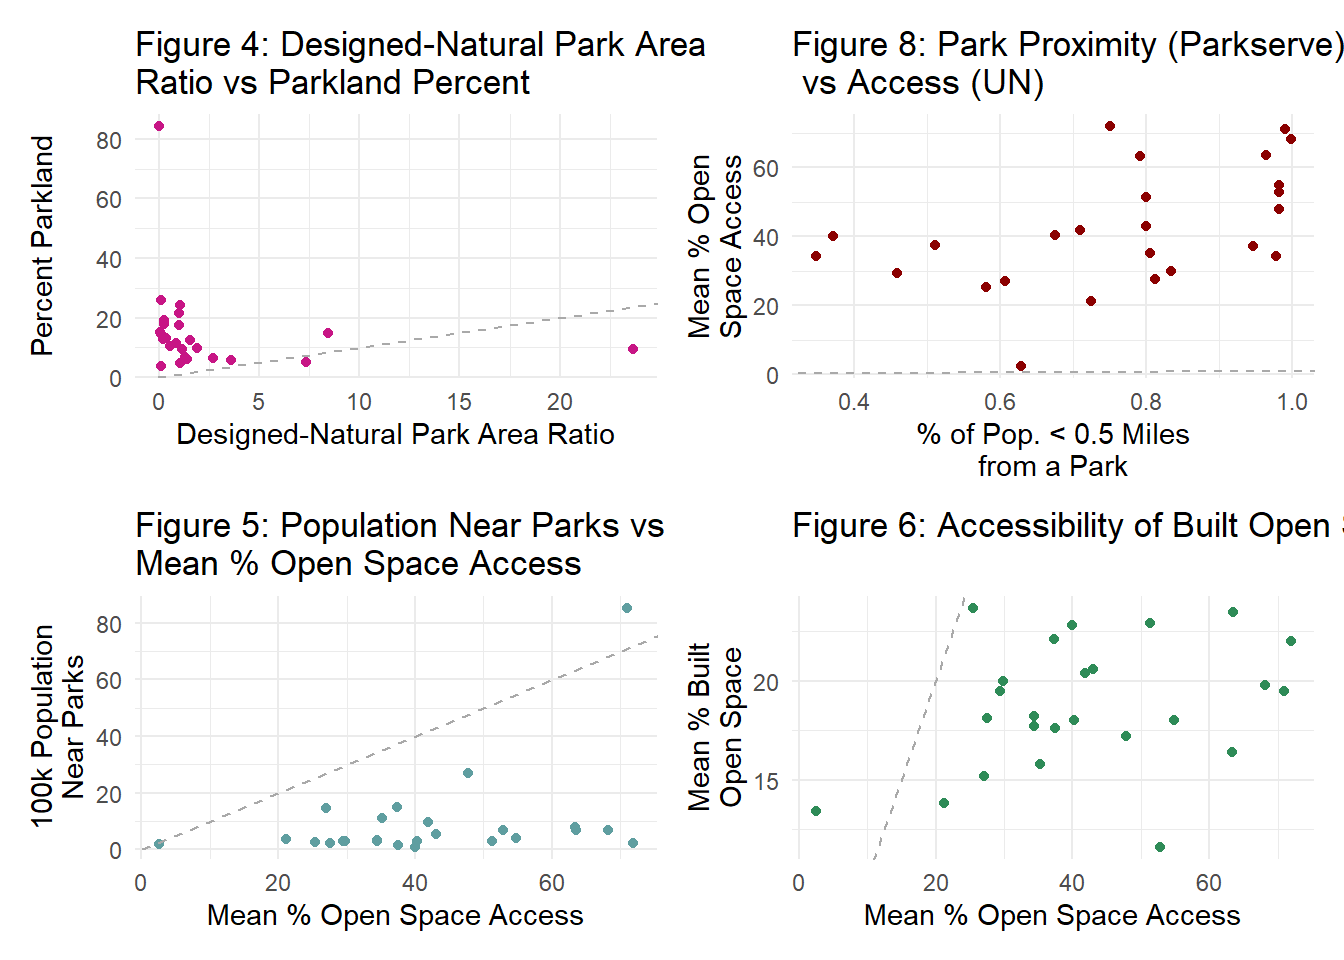

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

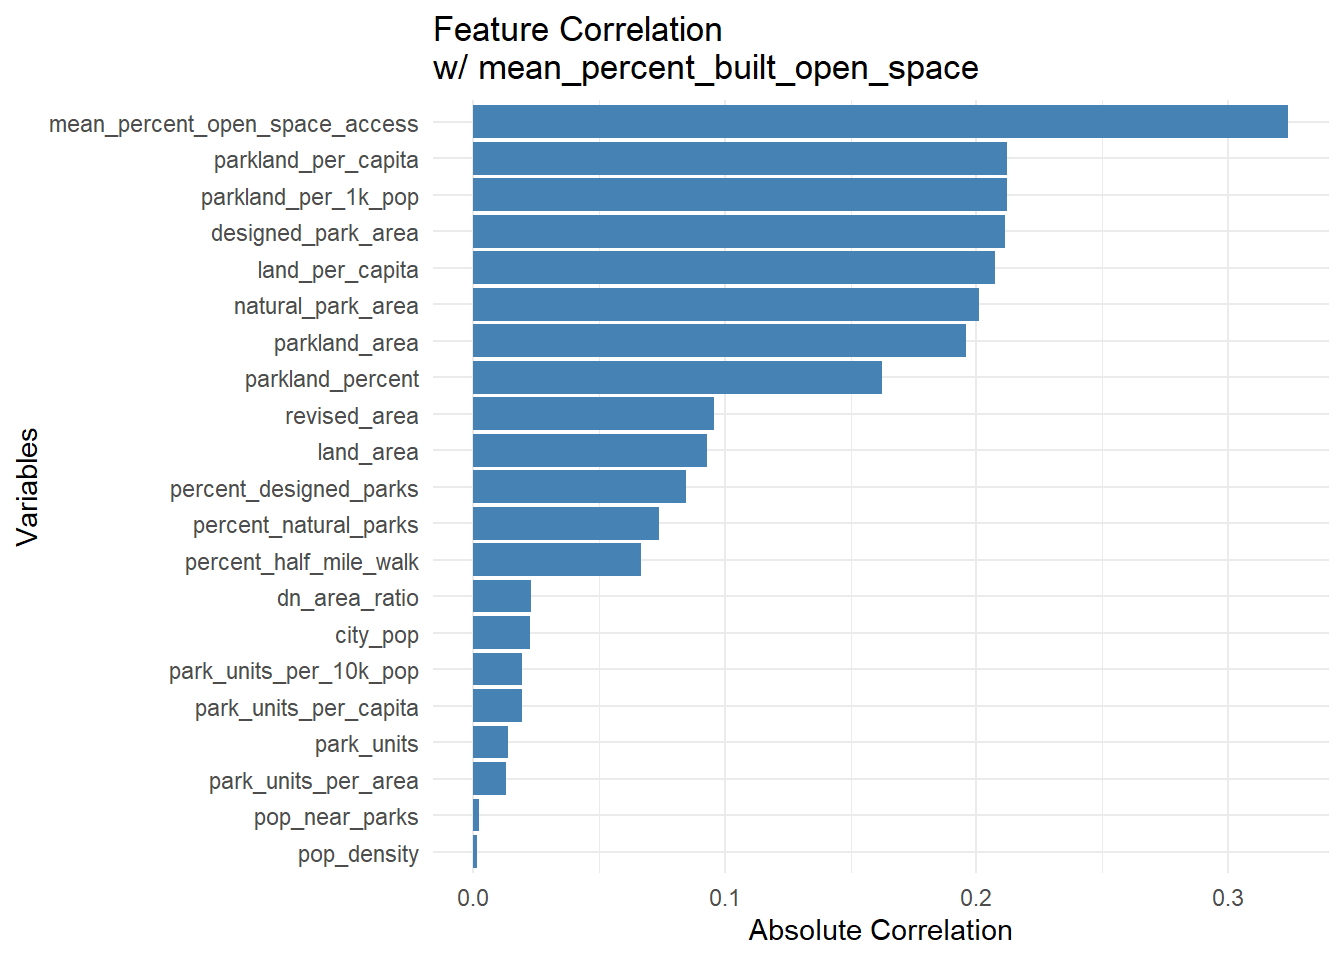

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

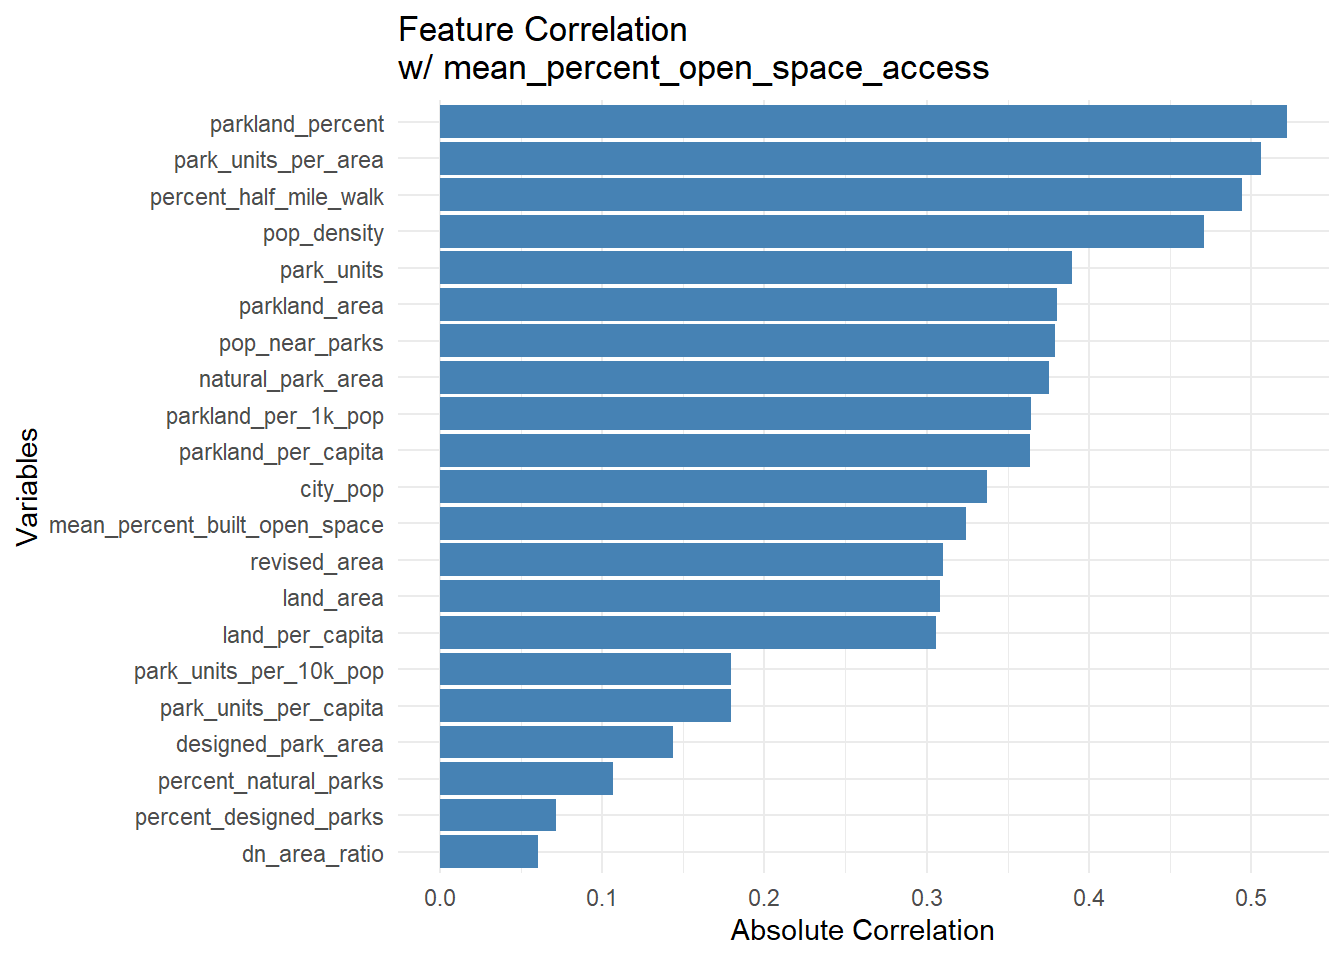

In [ ]:
# Descriptive Stats

  # Write function to round numeric columns to two decimal places
  round_numeric <- function(df) {
    df %>% 
      mutate(across(where(is.numeric), ~round(.x, 2)))
  }

  # Summarize stats by variable
    desc_stats_parks <- urban_parks_data %>% 
      select(where(is.numeric)) %>% 
      pivot_longer(cols = everything(), names_to = "variable", values_to = "value") %>% 
      group_by(variable) %>% 
      summarize(mean = mean(value, na.rm = TRUE), 
                median = median(value, na.rm = TRUE), 
                sd = sd(value, na.rm = TRUE),
                Q1 = quantile(value, 0.25, na.rm = TRUE),
                Q3 = quantile(value, 0.75, na.rm = TRUE)) %>% 
      round_numeric()
      
      # Print descriptive stats with flextable
      desc_stats_flex <- flextable(desc_stats_parks) %>%
        set_caption("Table 1: Summarized Urban Parks Statistics") %>% 
        set_header_labels(
          variable = "Variable",
          mean = "Mean",
          median = "Median",
          sd = "Standard Deviation",
          Q1 = "1st Quartile (Q1)",
          Q3 = "3rd Quartile (Q3)") %>% 
        autofit()

# Find Top/Bottom cities for percent parkland
  
  # Select relevant columns
    simplified_vars <- c("city_name", "city_pop", "revised_area", "pop_density", "parkland_area", "dn_area_ratio", "parkland_percent", "parkland_per_1k_pop", "percent_half_mile_walk", "pop_near_parks")
  
  # Filter top/bottom 10 cities
  top10_park_percent <- urban_parks_data %>% 
    arrange(desc(parkland_percent)) %>% 
    slice_head(n = 10) %>% 
    select(all_of(simplified_vars)) %>% 
    round_numeric()
  
  bottom10_park_percent <- urban_parks_data %>% 
    arrange(parkland_percent) %>% 
    slice_head(n = 10) %>% 
    select(all_of(simplified_vars)) %>% 
    round_numeric()
  
  # Create top/bottom 10 flextables w/ function
  # Create function
  make_best_worst_flextbl <-function(df, caption) {
    flextable(df) %>% 
    set_caption(caption) %>%
    set_header_labels(
      city_name = "City Name",
      city_pop = "City Population",
      revised_area = "City Land Area (Revised) (Acres)",
      pop_density = "Population Density (People/Acre)",
      parkland_area = "City Parkland Area (Acres)",
      parkland_percent = "Percent Parkland",
      parkland_per_1k_pop = "Parkland Per (1000) Capita",
      percent_half_mile_walk = "Percent of Residents within 0.5 Miles of a Park",
      dn_area_ratio = "Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%)") %>% 
    autofit()
  }
  
  top10_park_percent_flex <- make_best_worst_flextbl(top10_park_percent, "Table 2: Top 10 Cities for Parkland Percentage")
  
  bottom10_park_percent_flex <- make_best_worst_flextbl(bottom10_park_percent, "Table 3: Bottom 10 Cities for Parkland Percentage")
  
# Make plots to visualize the data
# Histogram: Land Area
land_area_plot <- ggplot(urban_parks_data, aes(x = as.numeric(land_area))) +
  geom_histogram(bins = 20, fill = "steelblue", color = "white") +
  labs(x = "Land Area (Acres)", y = "Frequency", title = "Figure 1: Distribution of City Land Areas") +
  theme_minimal() 

# Scatterplot: Land Area vs Parkland Area
land_vs_park_area_plot <- ggplot(urban_parks_data, aes(x = as.numeric(land_area), y = parkland_area)) +
  geom_point(color = "forestgreen") +
  labs(x = "Land Area (Acres)", y = "Parkland Area\n(Acres)", title = "Figure 2: Land Area vs Parkland Area") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal() 

# Scatterplot: Population Density vs Parkland Percent
density_vs_park_percent_plot <- ggplot(urban_parks_data, aes(x = as.numeric(pop_density), y = parkland_percent)) +
  geom_point(color = "darkorange") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Population Density (People/Acre)", y = "Percent Parkland", title = "Figure 3: Population Density vs\nParkland Percent") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal()

# Scatterplot: Designed-Natural Park Area Ratio vs Parkland Percent
dn_area_ratio_vs_park_percent_plot <- ggplot(urban_parks_data, aes(x = dn_area_ratio, y = parkland_percent)) +
  geom_point(color = "mediumvioletred") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Designed-Natural Park Area Ratio", y = "Percent Parkland", title = "Figure 4: Designed-Natural Park Area\nRatio vs Parkland Percent") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal()
  
# Scatterplot: Population Near Parks vs Mean % Open Space Access"
pop_park_proximity_plot <- ggplot(urban_parks_data, aes(x = mean_percent_open_space_access, y = (pop_near_parks/100000))) +
  geom_point(color = "cadetblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Mean % Open Space Access", y = "100k Population\nNear Parks", title = "Figure 5: Population Near Parks vs\nMean % Open Space Access") +
  theme_minimal()

# Scatterplot: Percent Open Space Access vs Percent Built Open Space
open_space_access_vs_built_plot <- ggplot(urban_parks_data, aes(x = mean_percent_open_space_access, y = mean_percent_built_open_space)) +
  geom_point(color = "seagreen") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Mean % Open Space Access", y = "Mean % Built\nOpen Space", title = "Figure 6: Accessibility of Built Open Space") +
  theme_minimal()

# Scatterplot: Land Per Capita vs Parkland Area
land_pc_vs_park_area_plot <- ggplot(urban_parks_data, aes(x = land_per_capita, y = parkland_area)) +
  geom_point(color = "royalblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Land Per Capita (Acres)", y = "Parkland Area (Acres)", title = "Figure 7: Land Per Capita vs Parkland Area") +
  theme_minimal()

# Scatterplot: Parkserve Proxomity Data vs\nUN Access Data
pct_walk_vs_osa_plot <- ggplot(urban_parks_data, aes(x = percent_half_mile_walk, y = mean_percent_open_space_access)) +
  geom_point(color = "darkred") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "% of Pop. < 0.5 Miles\nfrom a Park", y = "Mean % Open\nSpace Access", title = "Figure 8: Park Proximity (Parkserve)\n vs Access (UN)") +
  theme_minimal() 

# Use corr plots to show variables with strong impact on model outputs
  # Function to create a corr plot for a given target variable
  create_corr_plot <- function(data, target_var) {
    
    # Check if target_var exists in the dataset
    if (!(target_var %in% names(data))) {
      stop("Target variable not found in the dataset!")
    }
    
    # Compute correlation of all numeric variables with the target variable
    correlation_matrix <- cor(data %>% select_if(is.numeric), use = "complete.obs")  # Compute correlation matrix
    
    # Extract the correlation values for the target variable and convert to data frame
    correlation_data <- data.frame(
      variable = rownames(correlation_matrix),
      correlation = abs(correlation_matrix[target_var, ])
    ) %>%
        filter(variable != target_var) %>%  # Remove the target variable itself
        arrange(desc(correlation))  # Sort by correlation value
    
    # Create corr plot
    corr_plot <- ggplot(correlation_data, aes(x = reorder(variable, correlation), y = correlation)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      coord_flip() +  # Flip coordinates to create horizontal bars
      labs(x = "Variables", y = "Absolute Correlation", title = paste("Feature Correlation\nw/", target_var)) +
      theme_minimal()
    
    return(corr_plot)
  }

# Make plots
bos_corr_plot <- create_corr_plot(urban_parks_data, "mean_percent_built_open_space") +
  theme(plot.subtitle.title = element_text("Figure 9"))
osa_corr_plot <- create_corr_plot(urban_parks_data, "mean_percent_open_space_access") +
  theme(plot.subtitle.title = element_text("Figure 10"))

# Combine all plots in one figure using patchwork (optional)
pt1_eda_plots <- (land_area_plot | land_vs_park_area_plot) / 
  (density_vs_park_percent_plot | land_pc_vs_park_area_plot) +
    plot_layout(guides = "collect")

pt2_eda_plots <- (dn_area_ratio_vs_park_percent_plot | pct_walk_vs_osa_plot) / 
  (pop_park_proximity_plot | open_space_access_vs_built_plot) +
    plot_layout(guides = "collect")
  
# Display data summary and visualization

  # Display flextables
  desc_stats_flex

### EDA Summary

The majority of the city’s land areas are distributed within 100,000 and 300,000 acres of a city’s land area. This distribution ranged from 100,000 acres to 550,000 acres, with an outlying data point above 900,000 acres (Distribution of City Land Areas DOTHIS : change to fig number). The frequency of land area decreases as land area increases. We found little to no linear relationship between city land area and city parkland area (Land Area vs Parkland Area DOTHIS : change to fig number).). City land per capita, measured in acres, does not correlate with Parkland area (Land Per Capita vs Parkland Area DOTHIS : change to fig number).). The majority of cities have less than one acre of land per capita, and less than 125,000 acres of parkland per capita. Population density is weakly positive correlation with population density. As population density increases, the percentage of parkland in a city also increases (Population Density vs Parkland Percent). In Figure (Population Near Narks vs Mean % Open Space Access DOTHIS : change to fig number).), the majority of data points are below the 45-degree dashed line, meaning that for every data point, the population living near parks is consistently lower than the mean percentage of open space access. Figure (Park proximity vs Access DOTHIS : change to fig number).) does not show any or a weak correlation between the variables. When examining the correlation of all features within the dataset, we found that Parkland per Capita and Parkland per 1,000 People were the two most positively correlated features to the Mean Percentage of Built Open Space (figure needed DOTHIS : change to fig number).). When applying the same correlation analysis to our second focus variable, Mean Percentage Open Space Access, Park Units Per Area, and Percent of Residents within a Half Mile Walk were the most positively correlated to the variable.

### Modeling

#### Prep Data

In [ ]:
# Set a random seed for reproducibility
set.seed(567)

# Split data into training (80%) and testing (20%) sets
up_split <- initial_split(urban_parks_data, prop = 0.8)
up_train <- training(up_split)
up_test <- testing(up_split)

# Create 3-fold cross validation resampling for the training data
up_3cv <- vfold_cv(up_train, v = 3, strata = NULL)

#### Create Recipes

In [ ]:
# Recipe for mean_percent_built_open_space
rec_bos_1 <- recipe(mean_percent_built_open_space ~ parkland_per_capita + designed_park_area + land_per_capita + natural_park_area + parkland_area, data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

rec_bos_2 <- recipe(mean_percent_built_open_space ~ parkland_per_capita + designed_park_area + land_per_capita, data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

# Recipes for mean_percent_open_space_access
rec_osa_1 <- recipe(mean_percent_open_space_access ~ parkland_percent + percent_half_mile_walk + pop_density + parkland_area + pop_near_parks + parkland_per_capita + city_pop, data = up_train) %>%
  # Add interaction terms
  step_interact(terms = ~ parkland_percent:pop_density) %>%
  step_interact(terms = ~ parkland_percent:percent_half_mile_walk) %>%
  step_interact(terms = ~ pop_density:percent_half_mile_walk) %>% 
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)


rec_osa_2 <- recipe(mean_percent_open_space_access ~ parkland_percent + percent_half_mile_walk + pop_density + parkland_area , data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

#### Build Models

In [ ]:
# Linear Regression
lm_model <- linear_reg() %>%
  set_engine("lm") %>% 
  set_mode("regression")

# Random Forest (Tree-Based Model)
rf_model <- rand_forest() %>%
  set_engine("ranger") %>%
  set_mode("regression")

# Gradient Boosting Machine (Boosted Tree Model)
# More aggressive regularization to prevent over fitting
xg_model <- boost_tree() %>%
   set_engine("xgboost") %>%
  set_mode("regression")

#### Combine Models and Recipes

In [ ]:
# Compile list of models
models <- list(lm = lm_model, rf = rf_model, xg = xg_model)
# Compile one recipe list for each output
bos_recipes <- list(bos_1 = rec_bos_1, bos_2 = rec_bos_2)
osa_recipes <- list(osa_1 = rec_osa_1, osa_2 = rec_osa_2)

# Create workflow set for BOS
bos_wf_set <- workflow_set(
  preproc = bos_recipes, 
  models = models) %>% 
  workflow_map('fit_resamples', resamples = up_3cv)

#### Vizualize & Rank Model Performance

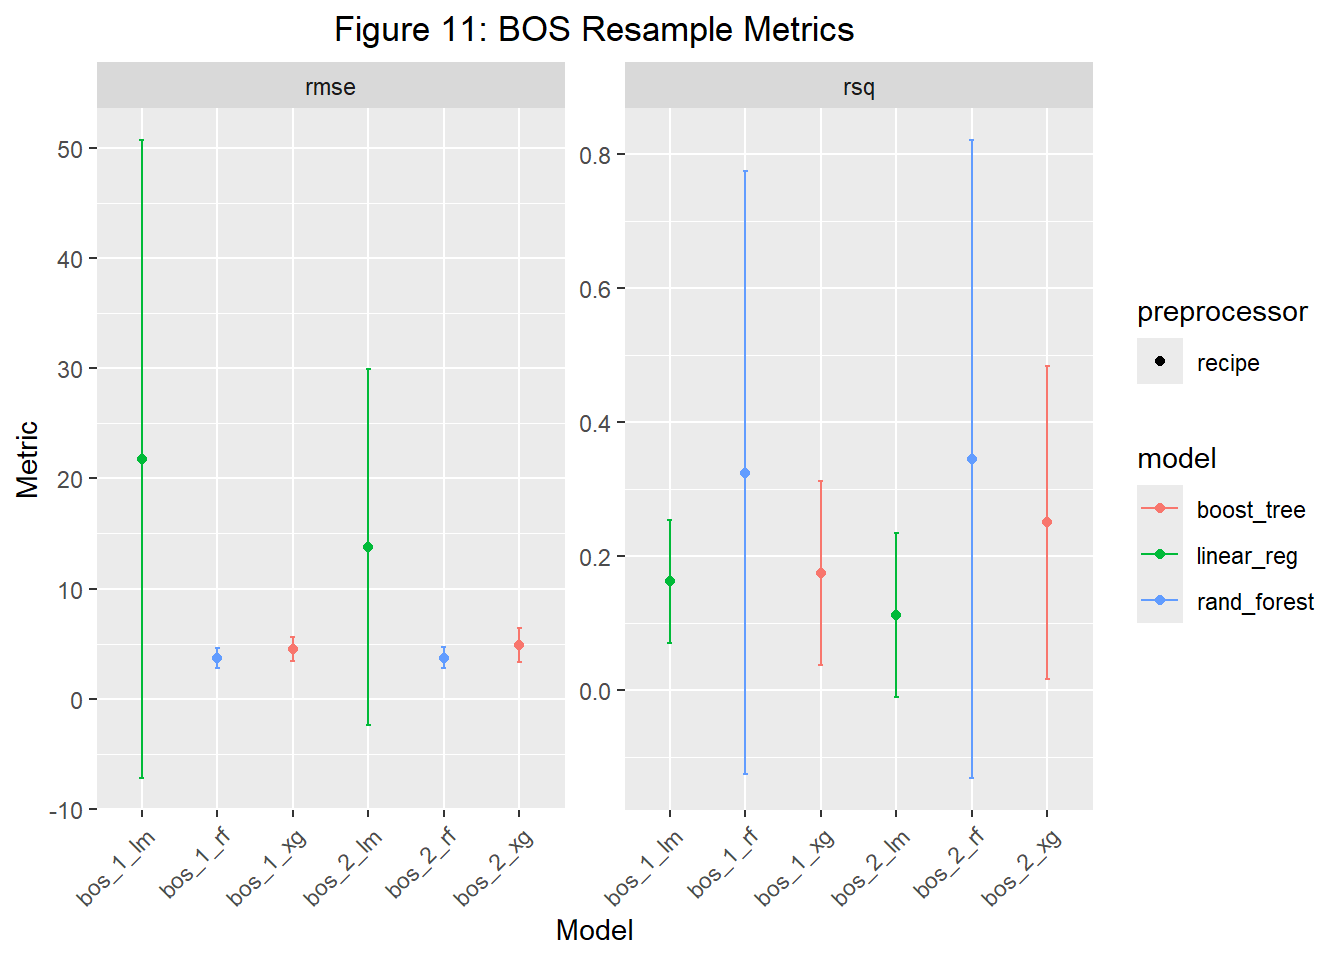

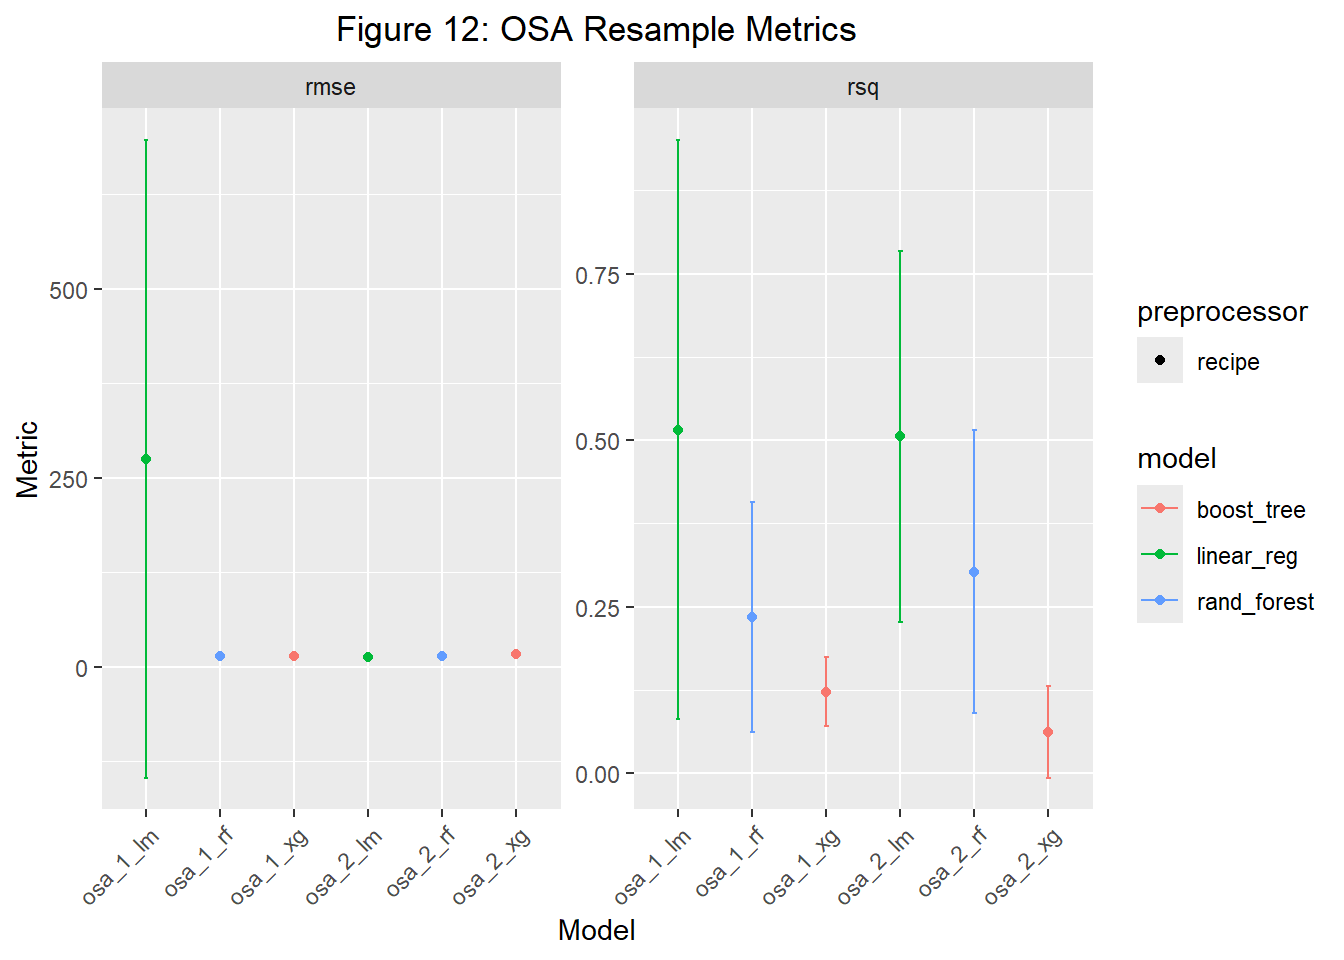

wflow_id,.config,.metric,mean,std_err,n,preprocessor,model,rank
bos_2_rf,Preprocessor1_Model1,rmse,3.7411029,0.59891367,3,recipe,rand_forest,1
bos_2_rf,Preprocessor1_Model1,rsq,0.3443191,0.28968211,3,recipe,rand_forest,1
bos_1_rf,Preprocessor1_Model1,rmse,3.7018159,0.56685291,3,recipe,rand_forest,2
bos_1_rf,Preprocessor1_Model1,rsq,0.3241036,0.27364624,3,recipe,rand_forest,2
bos_2_xg,Preprocessor1_Model1,rmse,4.8878321,0.94125107,3,recipe,boost_tree,3
bos_2_xg,Preprocessor1_Model1,rsq,0.2500242,0.14210625,3,recipe,boost_tree,3
bos_1_xg,Preprocessor1_Model1,rmse,4.4965564,0.65984413,3,recipe,boost_tree,4
bos_1_xg,Preprocessor1_Model1,rsq,0.1743254,0.08380129,3,recipe,boost_tree,4
bos_1_lm,Preprocessor1_Model1,rmse,21.7443046,17.60228115,3,recipe,linear_reg,5
bos_1_lm,Preprocessor1_Model1,rsq,0.1616320,0.05566050,3,recipe,linear_reg,5


wflow_id,.config,.metric,mean,std_err,n,preprocessor,model,rank
osa_1_lm,Preprocessor1_Model1,rmse,275.33964393,256.33604253,3,recipe,linear_reg,1
osa_1_lm,Preprocessor1_Model1,rsq,0.51580872,0.26424787,3,recipe,linear_reg,1
osa_2_lm,Preprocessor1_Model1,rmse,13.46668060,1.70629264,3,recipe,linear_reg,2
osa_2_lm,Preprocessor1_Model1,rsq,0.50547990,0.16955872,3,recipe,linear_reg,2
osa_2_rf,Preprocessor1_Model1,rmse,14.04976508,2.45439883,3,recipe,rand_forest,3
osa_2_rf,Preprocessor1_Model1,rsq,0.30246876,0.12897699,3,recipe,rand_forest,3
osa_1_rf,Preprocessor1_Model1,rmse,13.84363220,2.41203279,3,recipe,rand_forest,4
osa_1_rf,Preprocessor1_Model1,rsq,0.23429515,0.10482788,3,recipe,rand_forest,4
osa_1_xg,Preprocessor1_Model1,rmse,14.59851000,2.15861590,3,recipe,boost_tree,5
osa_1_xg,Preprocessor1_Model1,rsq,0.12253699,0.03106196,3,recipe,boost_tree,5


In [ ]:
# Visualize Model Performance
autoplot(bos_wf_set) + 
  aes(x = wflow_id) + 
  labs(title = "Figure 11: BOS Resample Metrics",
       x = "Model") +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1))

#### Model Tuning

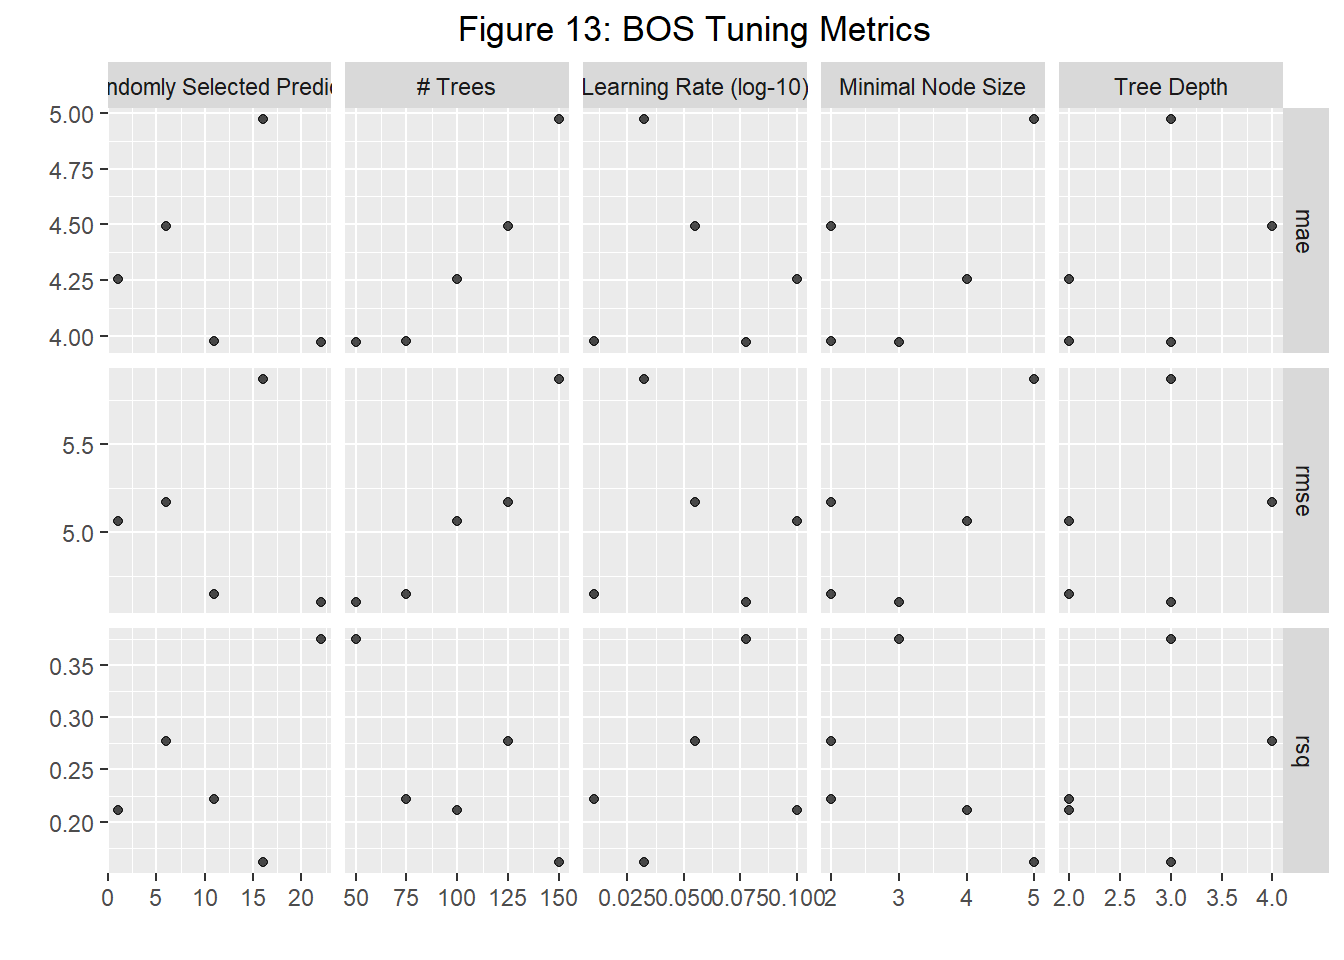

→ A | warning: 8 columns were requested but there were 4 predictors in the data. 4 will be used.

There were issues with some computations   A: x1

→ B | warning: 11 columns were requested but there were 4 predictors in the data. 4 will be used.

There were issues with some computations   A: x1
→ C | warning: 15 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
→ D | warning: 18 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
→ E | warning: 22 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
There were issues with some computations   A: x3   B: x3   C: x3   D: x3   E: x3

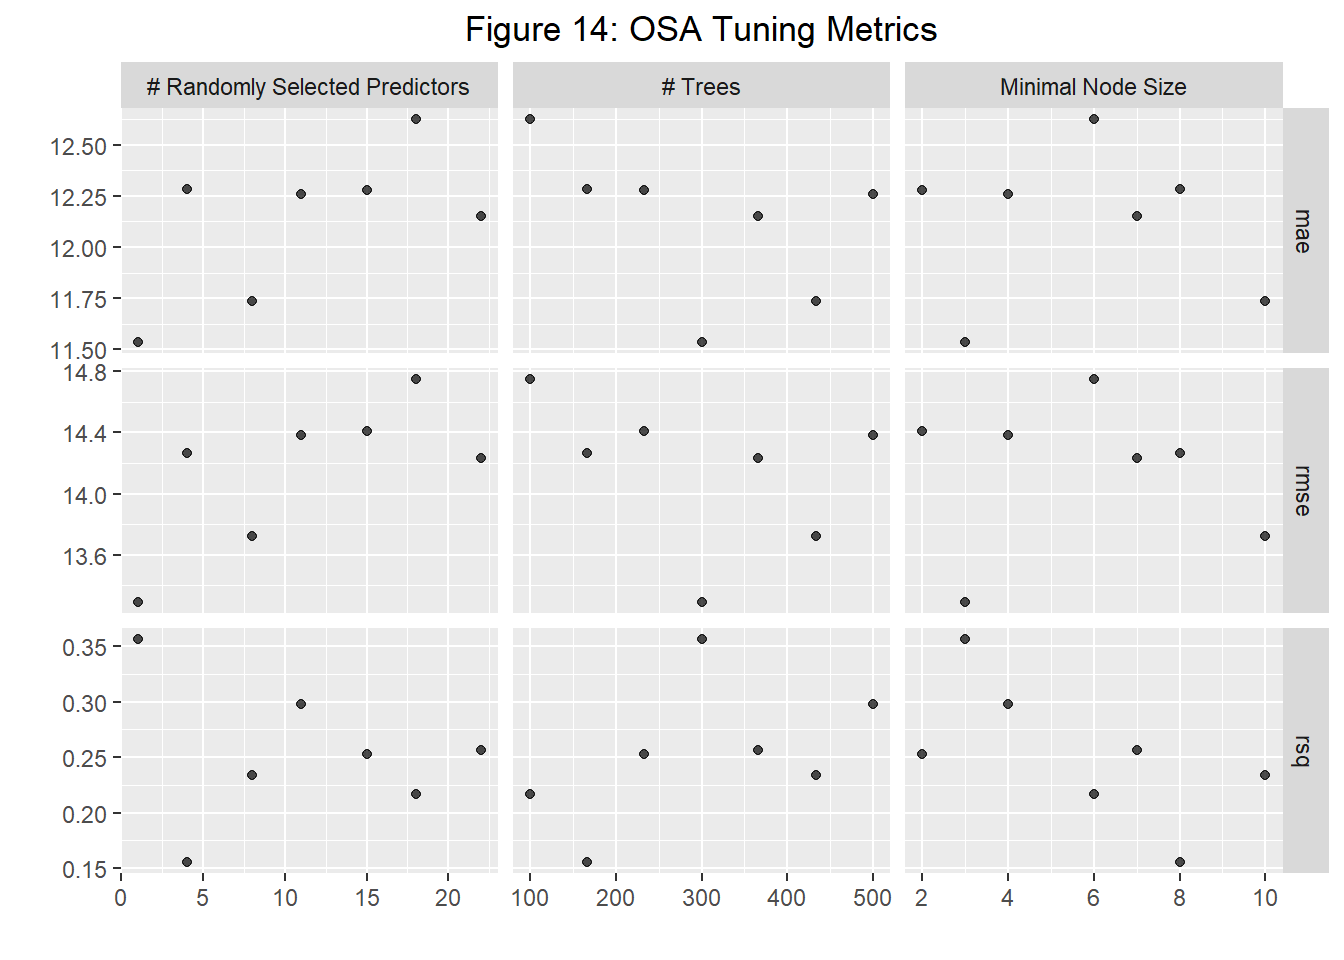

In [ ]:
# BOS Model Tuning (XGBoost)
tuned_bos_model <- boost_tree(
  mtry = tune(),
  trees = tune(),
  min_n = tune(),
  learn_rate = tune(),
  tree_depth = tune()
) %>%
  set_engine("xgboost") %>%
  set_mode("regression")

tune_bos_wf <- workflow() %>%
  add_recipe(rec_bos_2) %>%
  add_model(tuned_bos_model)

# Create parameter set
bos_dials <- parameters(
  mtry(range = c(1, ncol(up_train) - 1)), # Adjust range as needed
  trees(range = c(50, 150)),
  min_n(range = c(2, 5)),
  learn_rate(range = c(0.01, 0.1)),
  tree_depth(range = c(2, 4))
)

bos_grid <- grid_space_filling(bos_dials, size = 5)

bos_model_params <- tune_grid(
  tune_bos_wf,
  resamples = up_3cv,
  grid = bos_grid,
  metrics = metric_set(rmse, rsq, mae),
  control = control_grid(save_pred = TRUE),
  param_info = bos_dials
)

autoplot(bos_model_params) +
  labs(title = "Figure 13: BOS Tuning Metrics") + 
  theme(plot.title = element_text(hjust = 0.5))

#### Model Tuning Results

Warning in min(x, na.rm = na.rm): no non-missing arguments to min; returning
Inf

Warning in max(x, na.rm = na.rm): no non-missing arguments to max; returning
-Inf

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

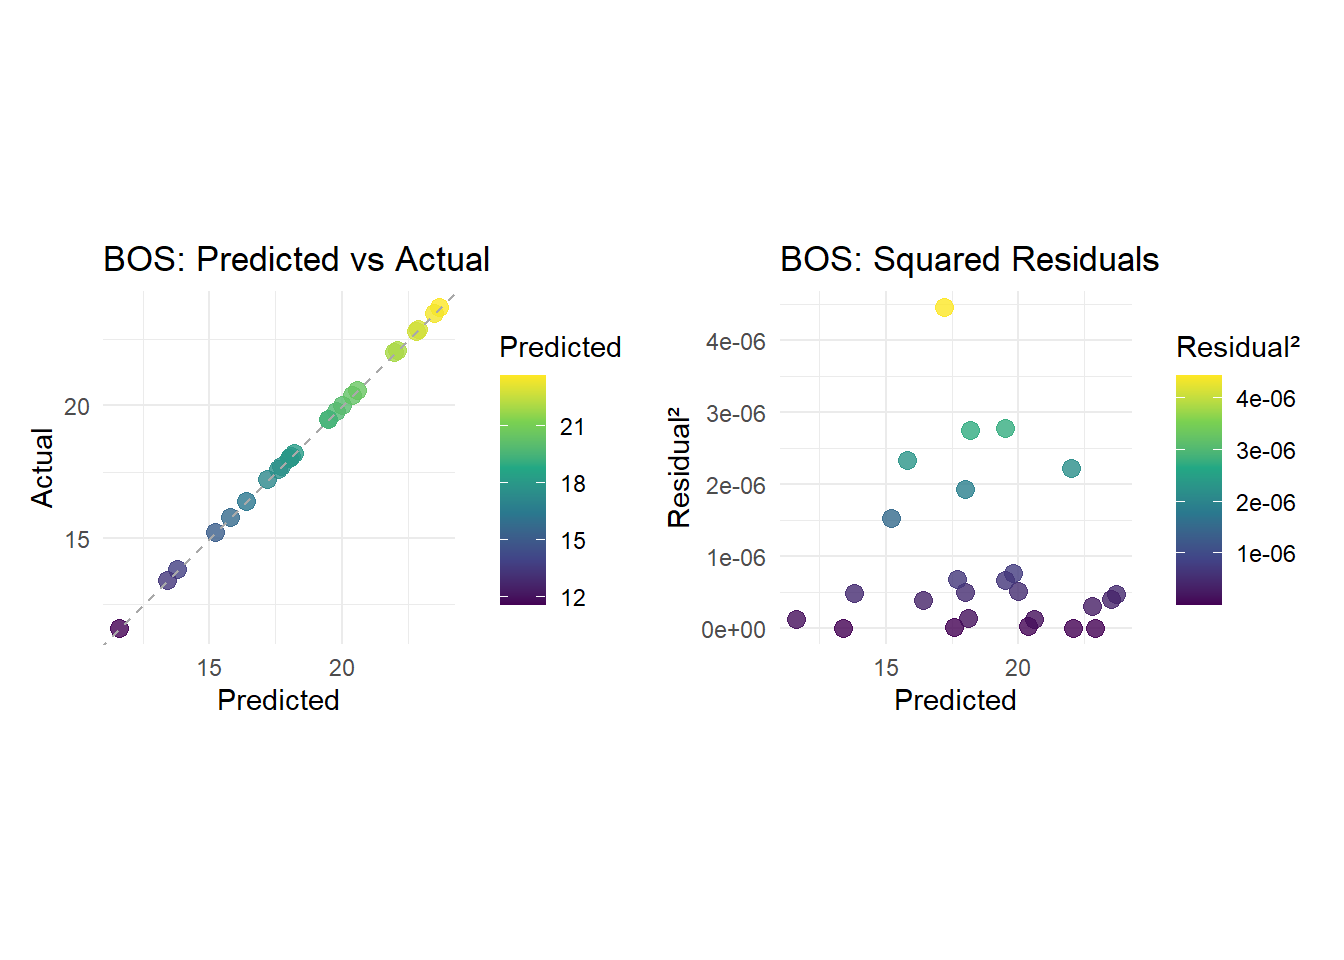

Warning in min(x, na.rm = na.rm): no non-missing arguments to min; returning
Inf

Warning in max(x, na.rm = na.rm): no non-missing arguments to max; returning
-Inf

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

Warning in plot_theme(plot): The `plot.subtitle.title` theme element is not defined in the element
hierarchy.

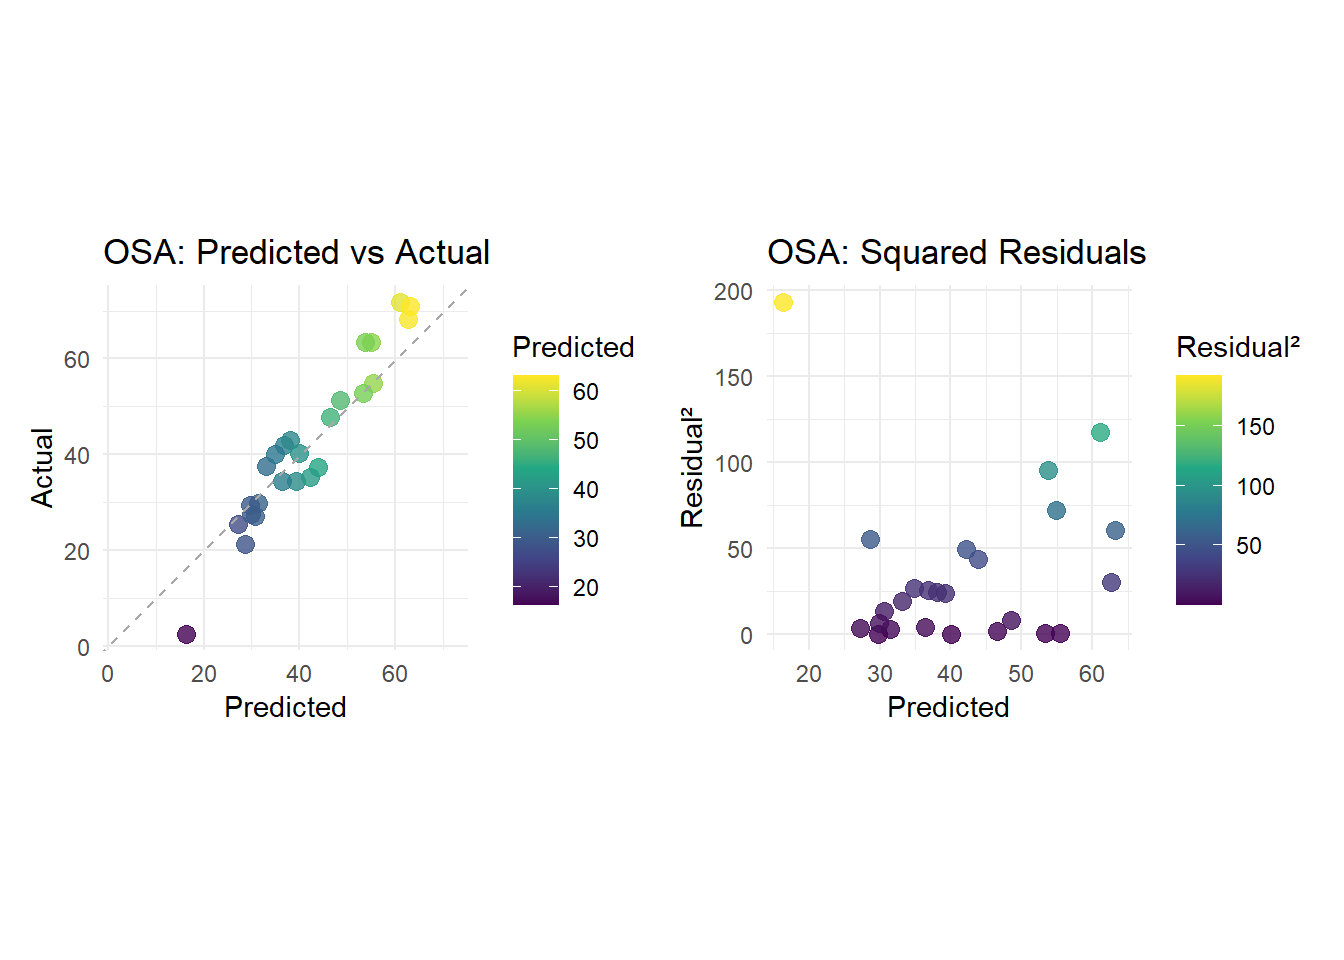

In [ ]:
# Finalize and fit full model for BOS
bos_final_fit_full <- fit(bos_final_wf, data = urban_parks_data)
bos_augmented_preds <- augment(bos_final_fit_full, new_data = urban_parks_data)

# Add residuals
bos_augmented_preds <- bos_augmented_preds %>% 
  mutate(residual_sq = (mean_percent_built_open_space - .pred)^2)

# Determine common axis ranges
bos_range <- range(c(bos_augmented_preds$.pred, bos_augmented_preds$mean_percent_built_open_space), na.rm = TRUE)
bos_residuals_range <- range(bos_augmented_preds$residuals_sq, na.rm = TRUE)

#### Modeling Summary

Initial modeling results for Built Open Space did not perform well. Boosttree, with the engine xgboost, has the lowest Root Mean Standard Error (RMSE), and the highest R-squared value. The RMSE value was ~5, and the R-squared was 0.25, meaning 25% of the variance can be explained by this regression model. (DOTHIS : add a figure number). Like Built Open Space, the initial models for Open Space Access did not have a clear winner that stood out. Linear Regression was chosen as the best model to display Open Space Access results because it had a relatively low RMSE and an R-squared value of 0.50, meaning 50% of the variance in this model can be explained (DOTHIS : add a figure number). After tuning for RMSE, the Boosted Tree model had an RMSE of 2.76 and an R-squared value of 0.01%. The Built Open Space Predicted vs. Actual values appeared to have a linear relationship, however, the squared residuals show little to no correlation between the predicted values and the residuals (DOTHIS : add a figure number). For Open Space Access, using Linear Regression resulted in an RMSE of 18.55 and an R-squared value of 0.66. Like Built Open Space, the predicted and actual values for Open Space Access appear to have a linear relationship, but the residuals do not. Figure **DOTHIS : add a figure number**, shows an outlier in the Open Space Access Predicted vs. Residual values, where the predicted value is very low (\>20), and the residual is extremely high, with a value of over 150.

### Discussion

Our research found no significant correlation between urban population density and public open space access. The small sample size of 25 cities led to some analysis issues when looking at the relationship between urban demographics and park access. Additionally, Anchorage, Alaska, was an outlying point throughout the analysis, consistently being at the extreme ends of our graphs. Yet, due to our small sample size, it was decided not to remove Alaska and make our sample size even smaller. Anchorage tended to skew the data because there is much higher public open space availability with much less population density due to the nature of the state. The small sample size also created issues in our modeling, such as having to perform a 3-fold cross-validation instead of a standard 10-fold cross-validation (see Modeling section). Figure \_\_ (DOTHIS : add in figure number for BOS actual vs predicted) does not show a relationship between Built Open Space predicted vs. actual residuals, meaning the model failed to accurately predict the amount of built open space in the cities. We did not find any correlation between a city’s population density and the amount of open space the city has, therefore, we reject the hypothesis that there is an intermediate/sublinear relationship between urban population density and public open space availability. This means that an increase in population or population density does not lead to city planners creating more green spaces to accommodate a growing urban population. The mental and physical health effects of a large, urban population without sufficient access to outdoor spaces are unknown and are grounds for further study.

### Conclusion

In conclusion, we found no correlation between urban population density and public open space access, meaning that there has not been a noticeable change in the urban planning sector to accommodate a continuously growing urban population. Additionally, it is unknown what the mental health effects for this population will be. Looking forward, it would be best to find a different dataset with more cities for our sample size so that we could remove any outliers that may skew our data, allowing us to come to a stronger conclusion. It is important for urban planners to start shifting towards more public open space access to make substantial improvements to society’s overall mental and physical health. This change could be difficult due to the recent and historical lack of public open space for city residents, but it is a change that should be recognized and attempted to move towards.

## References